<h1>앙상블 기법</h1>

<h2>bagging</h2>

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

df_clf = DecisionTreeClassifier()
df_clf.fit(X_train, y_train)
df_y_pred = df_clf.predict(X_test)

In [96]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [97]:
df_y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [130]:
y_pred.var()

0.24998400000000004

In [131]:
df_y_pred.var()

0.24959999999999996

In [73]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,
                           bootstrap=True, n_jobs=-1,
                           oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9349333333333333

In [74]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.936

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,
                                                       ym,
                                                       stratify=ym,
                                                       random_state=42)

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5,
                           n_jobs=-1,
                           random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

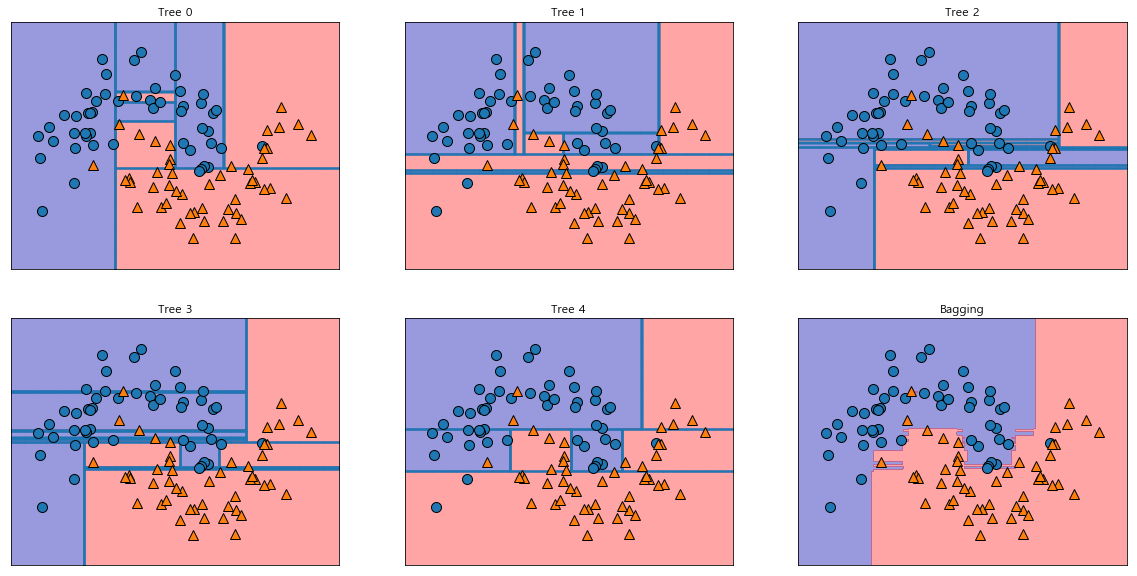

In [114]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

<h2>Randomforest</h2>

In [185]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42, max_features=1)
rnd_clf.fit(iris["data"], iris["target"])
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)

sepal length (cm) = 0.15248201360250646
sepal width (cm) = 0.10093662824980272
petal length (cm) = 0.3769190992167704
petal width (cm) = 0.36966225893092036


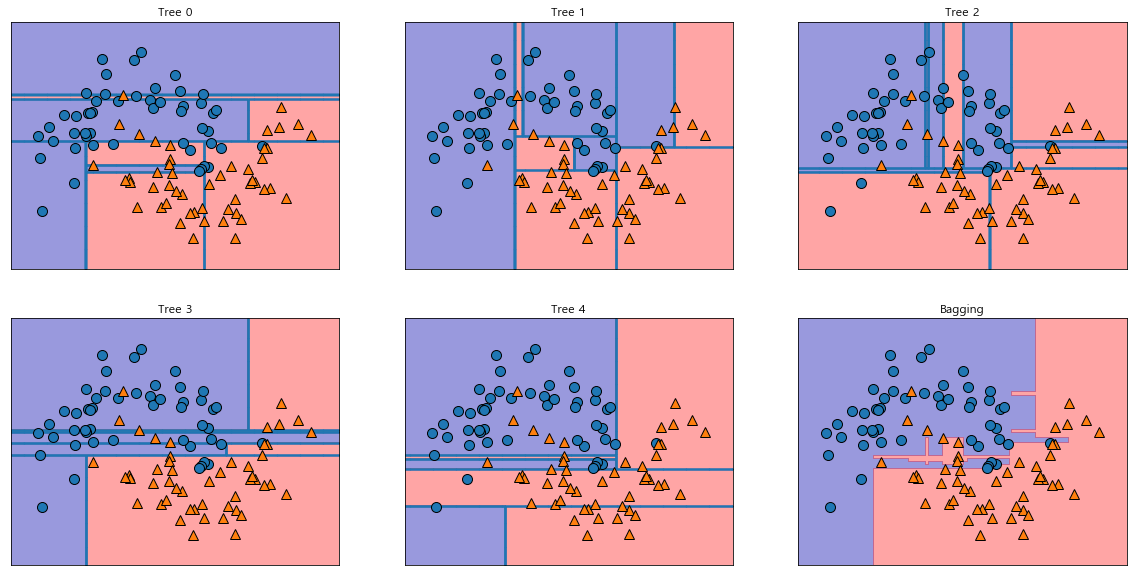

In [188]:
Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)
forest=RandomForestClassifier(n_estimators=5,max_features=1, random_state=2)
forest.fit(Xm_train,ym_train)

fig,axes= plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    

mglearn.plots.plot_2d_separator(forest,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

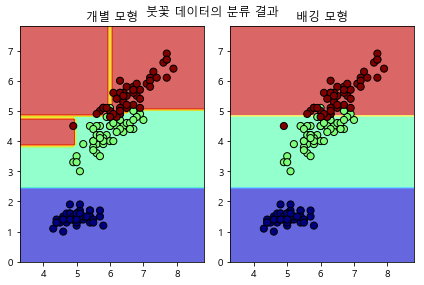

In [146]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

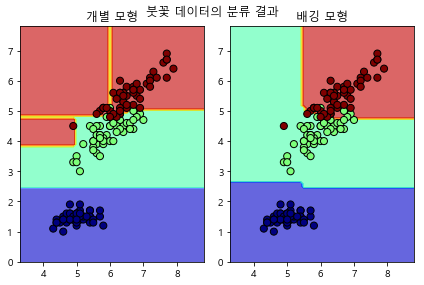

In [143]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

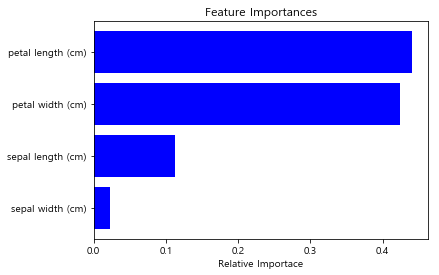

In [121]:
import numpy as np

features = iris["feature_names"]
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importace")
plt.show()

<h2>Boostring</h2>

In [10]:
import numpy as np


def loadSimpleDate():
    dataMat = np.matrix([[1., 2.1],
                    [2., 1.1],
                    [1.3, 1.],
                    [1., 1.],
                    [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return dataMat, classLabels

In [11]:
dataMat, classlabels = loadSimpleDate()

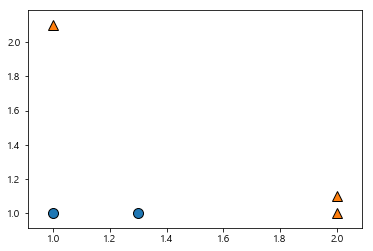

In [73]:
import matplotlib.pyplot as plt
import mglearn

plt.figure()
x = dataMat
y = classlabels
mglearn.discrete_scatter(x[:,0], x[:, 1], y)
plt.show()

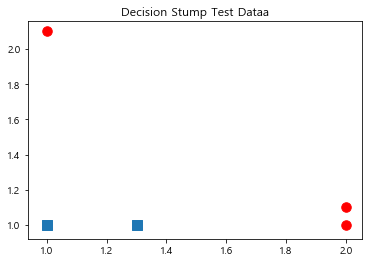

In [86]:
xcord0=[]
ycord0=[]
xcord1=[]
ycord1=[]




def loadSimpData():
    dataMat= np.matrix([[1.,2.1],
                    [2.,1.1],
                    [1.3,1.],
                    [1.,1.],
                    [2,1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return dataMat,classLabels
dataMat, classLabels= loadSimpData()

for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(dataMat[i,0]),ycord1.append(dataMat[i,1])
    else:
        xcord0.append(dataMat[i,0]), ycord0.append(dataMat[i,1])
        
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xcord0,ycord0,marker='s',s=90)
ax.scatter(xcord1,ycord1,marker='o',s=90,c='red')

plt.title('Decision Stump Test Dataa')
plt.show()

In [111]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArray = np.ones((np.shape(dataMatrix)[0], 1))
    if threshIneq == "lt":
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    #print(retArray)
    return retArray

In [136]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classlabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m, 1)))
    minError = np.inf
    for i in range(n):
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax - rangeMin)/numSteps
        for j in range(-1, int(numSteps) + 1):
            for inequal in ["lt", "gt"]:
                threshVal = (rangeMin + float(j)*stepSize)
                #print(i, threshVal, inequal)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                #print(predictedVals)
                errArr = np.mat(np.ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                #print(errArr)
                weightedError = D.T * errArr
                print(f"split : dim {i}, thresh {threshVal}, thresh ineqal: {inequal}, theweighted error is {weightedError}")
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump["dim"] = i
                    bestStump["thresh"] = threshVal
                    bestStump["ineq"] = inequal
    return bestStump, minError, bestClasEst

In [137]:
D = np.mat(np.ones((5, 1)) / 5)
buildStump(dataMat, classlabels, D)

split : dim 0, thresh 0.9, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 0.9, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.0, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.1, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.2, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.3, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.3, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.4, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.5, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.5

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [138]:
def adaBoostTrainDS(dataArr, classLabels, numlt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(numlt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print("D : ", D.T)
        alpha = float(0.5*np.log((1.0 - error)/max(error, 1e-16)))
        bestStump["alpha"] = alpha
        weakClassArr.append(bestStump)
        print("classEst : ", classEst.T)
        expon = np.multiply(-1*alpha*np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon))
        D = D / D.sum()
        aggClassEst += alpha * classEst
        print("aggClassEst : ", aggClassEst)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m, 1)))
        errorRate = aggErrors.sum() / m
        print("total error :", errorRate)
        if errorRate == 0:
            break
    return weakClassArr

In [139]:
adaBoostTrainDS(dataMat, classLabels, 9)

split : dim 0, thresh 0.9, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 0.9, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.0, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.1, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.2, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.3, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.3, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.4, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.5, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.5

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [117]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]["dim"],
                                classifierArr[i]["thresh"],
                                classifierArr[i]["ineq"])
        aggClassEst += classifierArr[i]["alpha"] * classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

classifierArr = adaBoostTrainDS(dataMat, classLabels, 30)

split : dim 0, thresh 0.9, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 0.9, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.0, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.1, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh ineqal: lt, theweighted error is [[0.4]]
split : dim 0, thresh 1.2, thresh ineqal: gt, theweighted error is [[0.6]]
split : dim 0, thresh 1.3, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.3, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.4, thresh ineqal: gt, theweighted error is [[0.8]]
split : dim 0, thresh 1.5, thresh ineqal: lt, theweighted error is [[0.2]]
split : dim 0, thresh 1.5

In [118]:
adaClassify([0, 0], classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

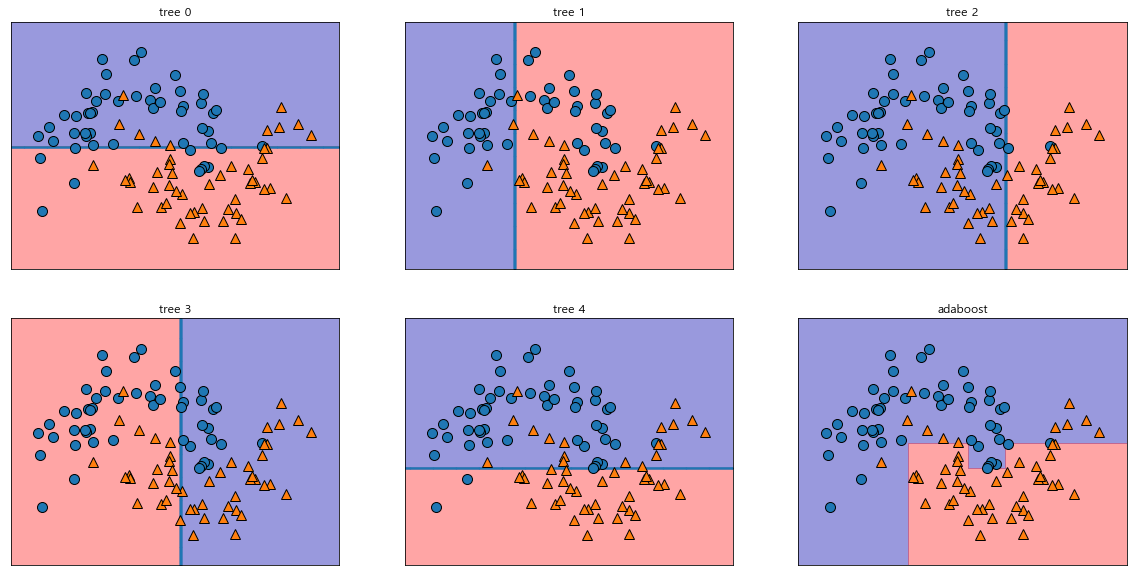

In [123]:
from sklearn.ensemble import AdaBoostClassifier


Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i , (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("adaboost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()